<a href="https://colab.research.google.com/github/alpellario/Insurance-Dataset-Cost-Analysis-Prediction/blob/main/Predicting_Medical_Insurance_Prices_A_Data_Driven_Approach_to_Forecasting_Heal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<tr>
<td></td><td></td>
<td>
<img src="https://i.hizliresim.com/oexkhsn.png" width="200" height="200" />
</td>
<td></td>
<td style="padding-left:40px;">

# <strong>SERKAN KAAN KUHEYLAN</strong><br>
## <a href="https://github.com/alpellario?tab=repositories" target=”_blank”>Visit my GitHub repositories</a><br>
## <a href="https://www.linkedin.com/in/serkan-kaan-k%C3%BCheylan-a482b3180/" target=”_blank”>Visit my LinkedIn account</a>
## <a href="https://serkankaankuheylan.com/" target=”_blank”>Visit my Website</a>
</td>
</tr>
</table>


# **Data Analytics for Insurance Cost Data Set**

## **Predicting Medical Insurance Prices: A Data-Driven Approach to Forecasting Heal**

####**Dataset** : https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction?resource=download

####**Dataset Overview(Kaggle)**:
* The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers.

* To provide insights into the key factors that contribute to higher insurance costs and help the company make more informed decisions regarding pricing and risk assessment.

* **The dataset contains 2.7K rows and 7 columns**

####**Parameters**

1. **Age** : Age of the insured. Integer quantity.

2. **Gender** : Gender of the insured. This parameter has been mapped to numerical values in the following way.	***(Female	1, Male	2)***

3. **BMI** : Body Mass Index of the insured. Float value quantity.

4. **No_of_Children** : Number of children the insured person has. Integer quantity.

5. **Smoker** : Whether the insured person is a smoker or not. This parameter has been mapped to numerical values in the following way. ***(Smoker	0, Non smoker	1)***

6. **Region** : Which region of the USA does the insured belong to. This parameter has been mapped to numerical values in the following way. ***(Northwest	1, Northeast	2, Southwest	3, Southeast	4)***

7. **Charges** : Charges for the insurance in USD. Floating value quantity.

<br>

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

<br>
<br>

#### **Problem Statement:**

* What are the most important factors that affect medical expenses?
* How well can machine learning models predict medical expenses?
* How can machine learning models be used to improve the efficiency and profitability of health insurance companies?

###**Objectives**

In this project, I will:

1. Load the data into a pandas dataframe to prepare it for analysis.

2. Clean the data by addressing any blank entries to ensure the integrity of the dataset.
3. Conduct exploratory data analysis to identify the attributes that significantly influence the charges.
4. Develop both single-variable and multi-variable Linear Regression models to predict the charges effectively.
5. Employ Ridge regression to enhance the performance of the Linear Regression models and refine their predictive accuracy.

## **Importing Required Libraries & Setup**

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline
pd.set_option('display.max_columns', None)

In [367]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
#df = pd.read_csv(filepath, header=None)

In [368]:
df = pd.read_csv('/content/Medical_insurance.csv', header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [369]:
header_string = 'age gender bmi no_of_children smoker region charges'
headers = header_string.split(' ')

df.columns = headers
print(df.columns)

Index(['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region',
       'charges'],
      dtype='object')



Upon reviewing the data, I noticed that missing values are represented by '?' instead of being left blank. To streamline the cleaning process and facilitate further analysis, I will convert these '?' symbols into np.nan values, making them more recognizable and easier to handle during the data preprocessing phase.

In [370]:
df.replace('?', np.nan, inplace=True)

## **Data Wrangling**

For **continuous attributes**, such as **`age`**, I will replace missing values with the **`attribute's mean`** to maintain statistical integrity and prevent distortion in data analysis. For **categorical attributes**, such as **`smoker`** status, I will substitute missing values with the mode, or **`most frequent value`**, to reflect the most common category within the dataset. I will also truncate the decimal places of the values in the **`charges`** column from six digits to two. This will simplify the data and improve readability without significantly impacting the accuracy of our analysis.

Additionally, I have observed that columns with missing data are denoted with a '?', which results in these fields being treated as strings due to their object data type. I will convert these fields into **`integer`** values after handling the missing data to ensure proper numerical analysis and computation.

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [372]:
mean_age = df['age'].astype('float64').mean()

df['age'].fillna(mean_age, inplace=True)

In [373]:
df['smoker'].value_counts()

0    2201
1     564
Name: smoker, dtype: int64

In [374]:
most_frequent_value = df['smoker'].value_counts().idxmax()

df['smoker'].fillna(value = most_frequent_value, inplace=True)

In [375]:
df[['smoker', 'age']] = df[['smoker', 'age']].astype('int64')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [377]:
df['charges'] = np.round(df['charges'], 2)

df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


## **Exploratory Data Analysis (EDA)**

In [378]:
sns.set_style('whitegrid')

Initially, I will construct and visualize the **`correlation matrix`** for the dataset to discern the interrelationships among all columns. Subsequently, I will identify the columns that exhibit the strongest correlation with the target variable, **`'charges'`**. I will visualize the data from these columns, ranging from the most to the least correlated, provide a concise interpretation, and aim to gain a deeper understanding of the dataset's dynamics.

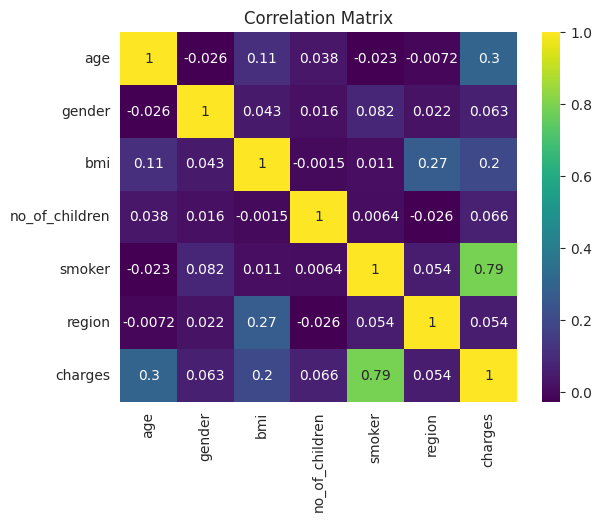

In [379]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

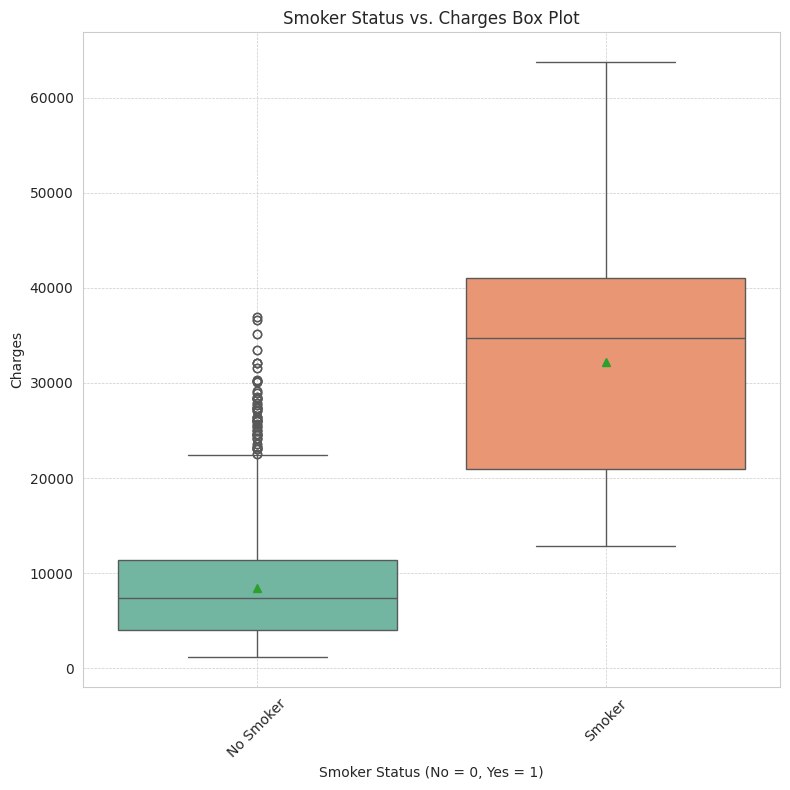

In [380]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='smoker', y='charges', showmeans=True, palette="Set2", hue='smoker', legend=False)

plt.xlabel('Smoker Status (No = 0, Yes = 1)')
plt.ylabel('Charges')
plt.title('Smoker Status vs. Charges Box Plot')

plt.xticks([0, 1], ['No Smoker', 'Smoker'])
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

The boxplot compares medical charges between non-smokers and smokers. Non-smokers have lower medical charges with a median around \$7,000 to \$8,000, while smokers have much higher charges with a median approximately \$35,000. The range of charges is wider for smokers, indicating more variability in their costs. Smokers also show higher extremes, with charges going up to nearly \$60,000. This suggests that smoker status, which has the highest correlation with medical charges in the dataset, significantly affects healthcare expenses.

Text(0, 0.5, 'Charges')

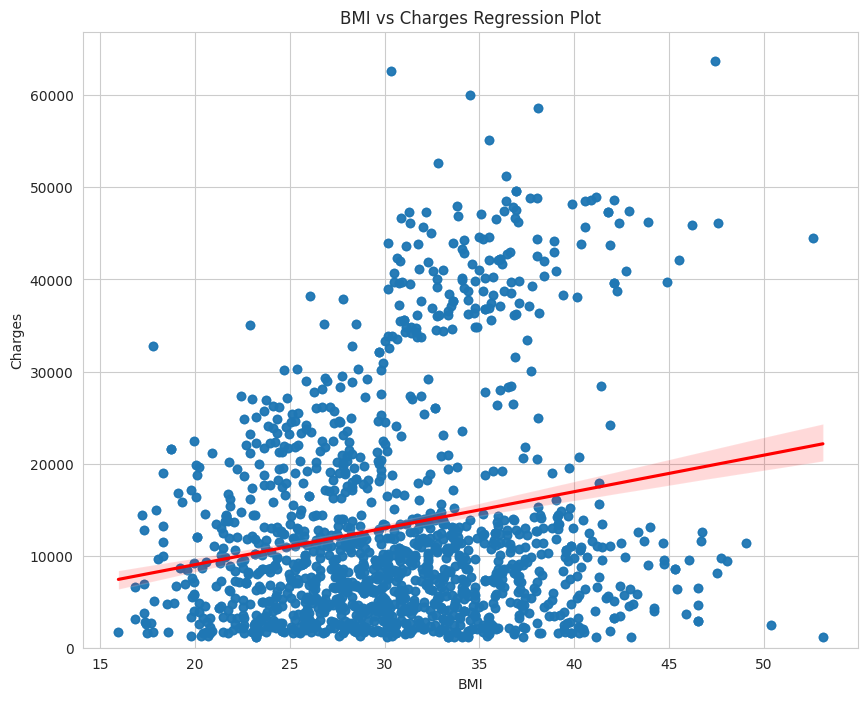

In [381]:
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='bmi', y='charges', line_kws={'color': 'red'})
plt.ylim(0,)
plt.title('BMI vs Charges Regression Plot')
plt.xlabel('BMI')
plt.ylabel('Charges')

The scatter plot illustrates the relationship between Body Mass Index (BMI) and medical charges. We can observe a positive trend, indicated by the red regression line, which suggests that as BMI increases, the charges for medical services also tend to increase. However, the data points are widely dispersed, indicating a significant variance and suggesting that other factors besides BMI may also play a crucial role in determining medical charges.

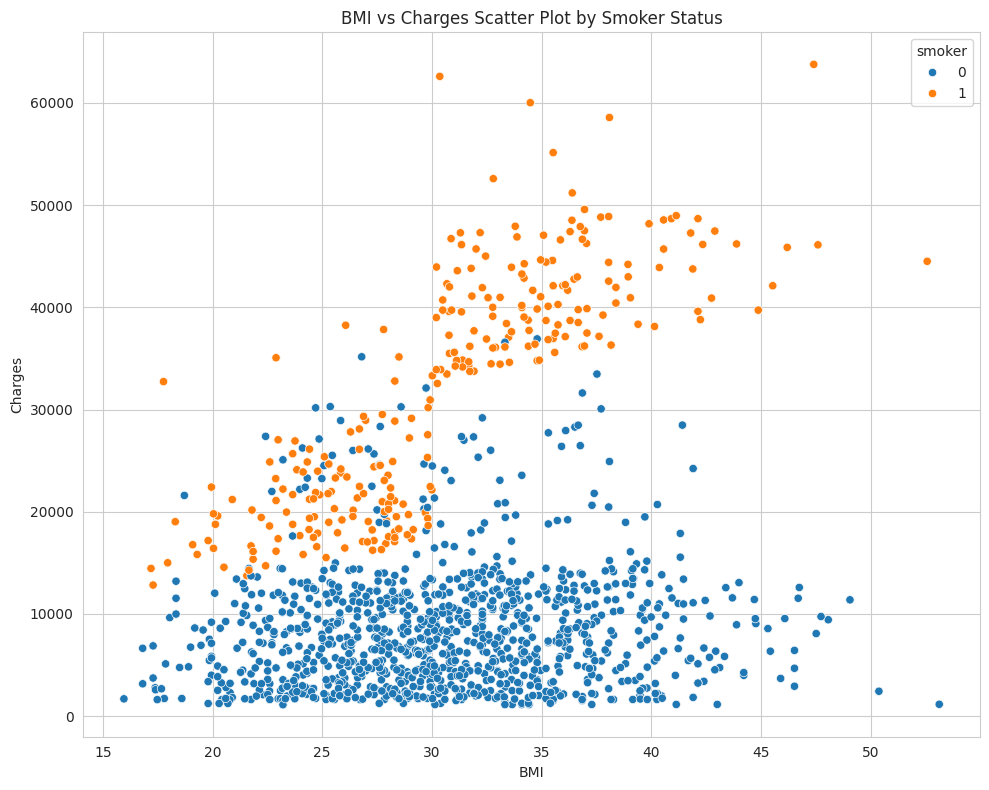

In [382]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges Scatter Plot by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

The scatter plot presents the relationship between Body Mass Index (BMI) and medical charges, differentiated by smoking status. Blue points represent non-smokers (smoker = 0), while orange points represent smokers (smoker = 1). Here is a clear positive correlation between BMI and insurance charges for smokers (orange points). The scatter plot shows that as BMI increases, insurance charges tend to increase, especially noticeable among smokers. For non-smokers (blue points), while there is a slight positive trend, the charges remain relatively lower and less varied compared to smokers.

Text(0, 0.5, 'Charges')

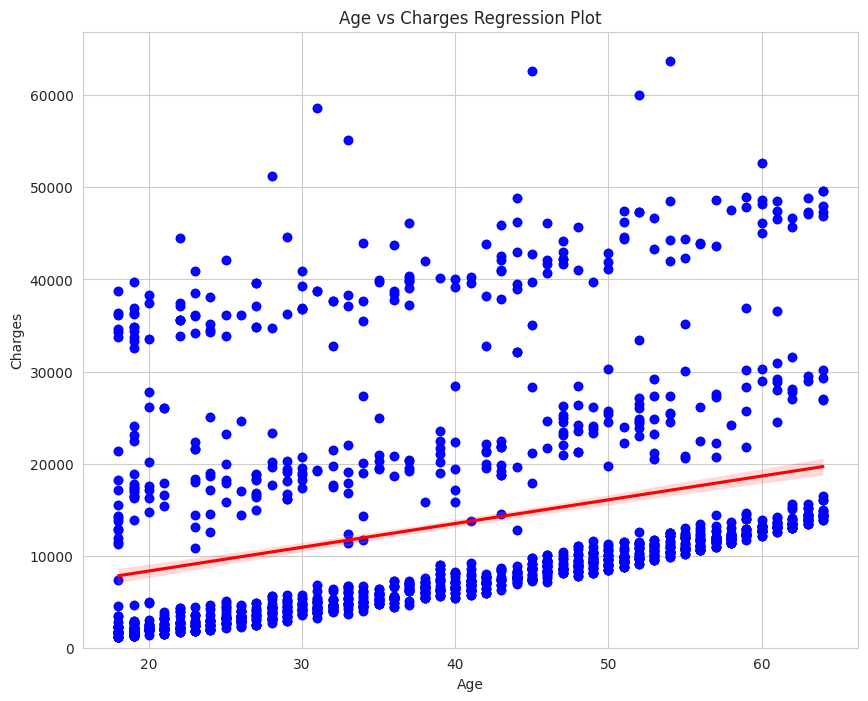

In [383]:
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='age', y='charges', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.ylim(0,)
plt.title('Age vs Charges Regression Plot')
plt.xlabel('Age')
plt.ylabel('Charges')

The scatter plot shows the relationship between age and medical charges. There is a positive but weak correlation, as indicated by the red regression line; while medical charges tend to increase with age, the wide spread of data points suggests a high level of variability

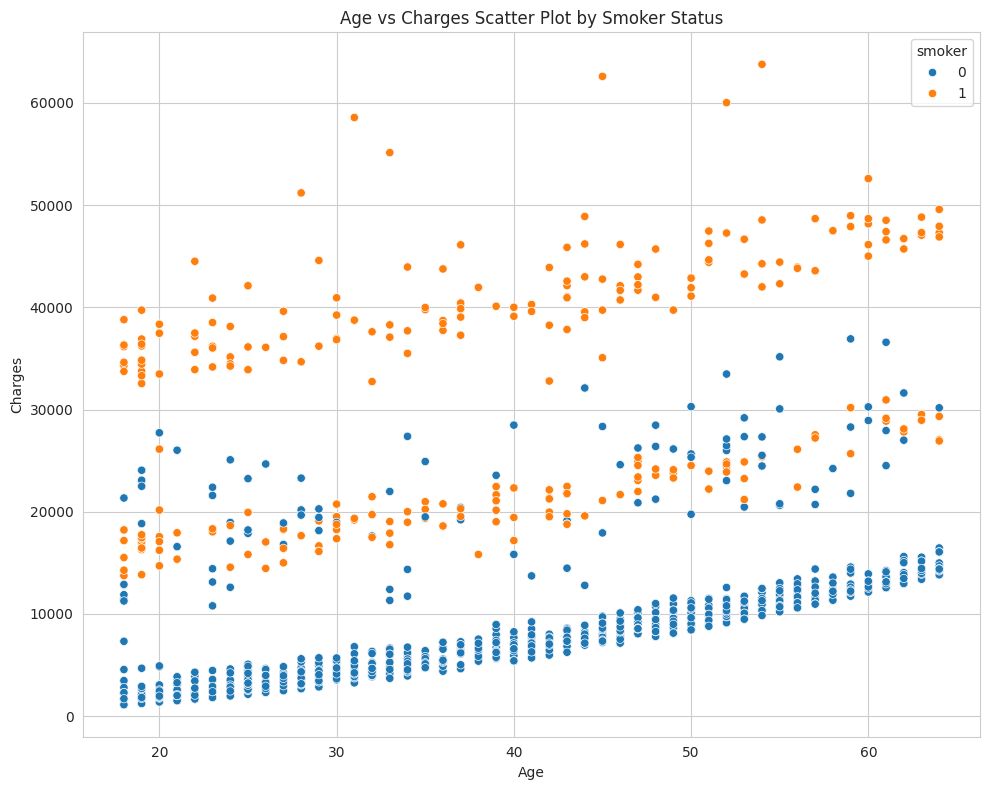

In [384]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges Scatter Plot by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

The scatter plot shows health expenses by age, grouped by smoking status. As age increases, smokers (orange dots) generally face much higher health expenses compared to non-smokers (blue dots). While older individuals generally incur higher health costs, the expenses for older smokers significantly surpass those of older non-smokers, demonstrating the substantial financial impact of smoking in conjunction with aging.

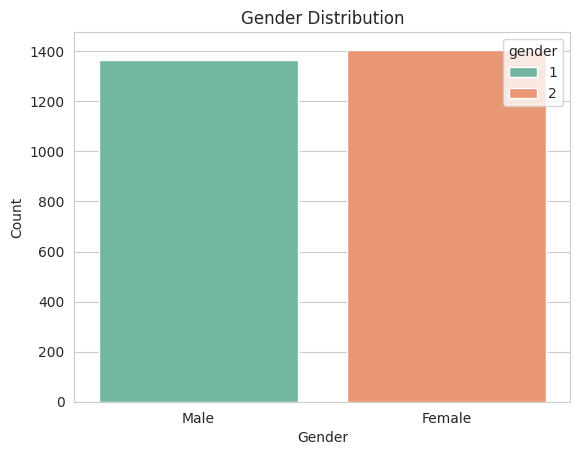

In [385]:
sns.countplot(x=df["gender"], palette="Set2", hue=df['gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

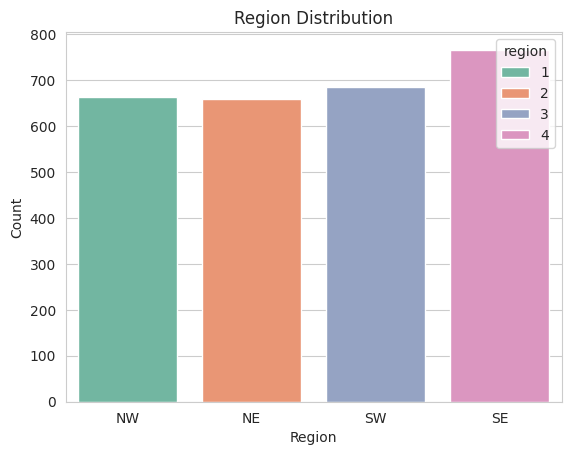

In [386]:
sns.countplot(x=df["region"], palette="Set2", hue=df['region'])
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['NW', 'NE', 'SW', 'SE'])
plt.show()

## **Model Development**

In [387]:
X = df[['smoker']]

y = df['charges']

lr_smoker = LinearRegression()

lr_smoker.fit(X, y)

print(f"R^2 Score : {lr_smoker.score(X, y)}")

R^2 Score : 0.6221791733924185


In [388]:
X = df.drop('charges', axis=1)

y = df['charges']

lr_model = LinearRegression()

lr_model.fit(X, y)

print(f'R^2 Score : {lr_model.score(X, y)}')

R^2 Score : 0.7504083820289634


In [389]:
X = df.drop('charges', axis=1)

y = df['charges']

Input = [('scalar', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(X, y)

print(f'R^2 Score : {pipe.score(X,y)}')

R^2 Score : 0.8452541227959774


## **Model Refinement**


I'll start by dividing the dataset into training (80%) and testing (20%) sets. Then, I will explore various modeling approaches, including Polynomial transformation to find the optimal degree, Ridge regression using GridSearchCV for the best alpha, and evaluating a Decision Tree Regressor. For each model, I'll calculate and compare the MSE, RMSE, and R² score to determine their predictive accuracies. Additionally, I'll visualize the prediction distributions to further analyze their performance. Finally, I will perform a comparative analysis to identify the most effective modeling approach.

In [399]:
X = df.drop('charges', axis=1)

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Polynomial(degree=2) R^2 Score on test data : 0.7835927871898704
Polynomial(degree=2) MSE on test data : 28519510.168909565
Polynomial(degree=2) RMSE on test data : 5340.366108134307



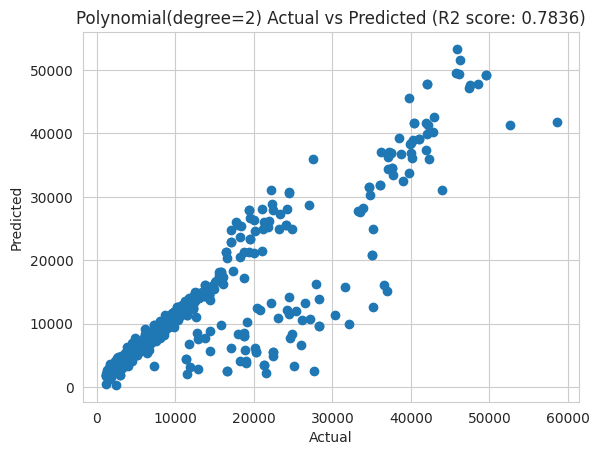

In [400]:
pr_deg_2 = PolynomialFeatures(degree = 2)

X_train_pr = pr_deg_2.fit_transform(X_train, y_train)
X_test_pr = pr_deg_2.fit_transform(X_test, y_test)

lr_poly_model = LinearRegression()
lr_poly_model.fit(X_train_pr, y_train)

pr2_score = lr_poly_model.score(X_test_pr, y_test)

y_pred = lr_poly_model.predict(X_test_pr)

pr2_mse = mean_squared_error(y_test, y_pred)

print(f'Polynomial(degree=2) R^2 Score on test data : {pr2_score}')
print(f'Polynomial(degree=2) MSE on test data : {pr2_mse}')
print(f'Polynomial(degree=2) RMSE on test data : {np.sqrt(pr2_mse)}')

print('')

plt.scatter(y_test, y_pred)
plt.title(f'Polynomial(degree=2) Actual vs Predicted (R2 score: {pr2_score:.4f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0.5, 1.0, 'R^2 Using Test Data')

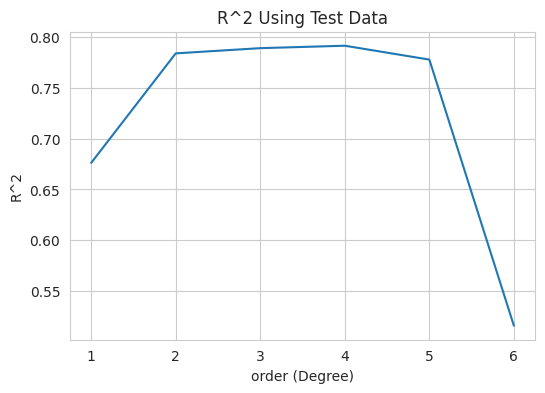

In [401]:
lr1 = LinearRegression()
Rsqu_test = []
order = [1,2,3,4,5,6]

for n in order:
  pr = PolynomialFeatures(degree=n)
  X_train_pr_1 = pr.fit_transform(X_train, y_train)
  X_test_pr_1 = pr.fit_transform(X_test, y_test)
  lr1.fit(X_train_pr_1, y_train)
  Rsqu_test.append(lr1.score(X_test_pr_1, y_test))

plt.figure(figsize=(6,4))
plt.plot(order, Rsqu_test)
plt.xlabel('order (Degree)')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Polynomial(degree=4) R^2 Score on test data : 0.7911015786384104
Polynomial(degree=4) MSE on test data : 27529954.177258093
Polynomial(degree=4) RMSE on test data : 5246.899482290288



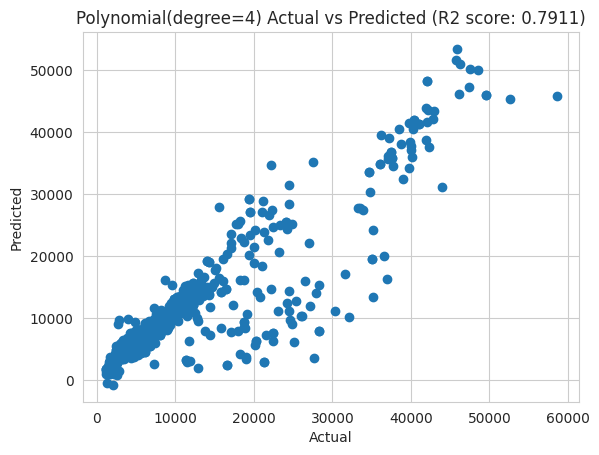

In [402]:
pr = PolynomialFeatures(degree = 4)

X_train_pr = pr.fit_transform(X_train, y_train)
X_test_pr = pr.fit_transform(X_test, y_test)

lr_poly_model = LinearRegression()
lr_poly_model.fit(X_train_pr, y_train)

pr4_score = lr_poly_model.score(X_test_pr, y_test)

y_pred = lr_poly_model.predict(X_test_pr)

pr4_mse = mean_squared_error(y_test, y_pred)

print(f'Polynomial(degree=4) R^2 Score on test data : {pr4_score}')
print(f'Polynomial(degree=4) MSE on test data : {pr4_mse}')
print(f'Polynomial(degree=4) RMSE on test data : {np.sqrt(pr4_mse)}')
print('')

plt.scatter(y_test, y_pred)
plt.title(f'Polynomial(degree=4) Actual vs Predicted (R2 score: {pr4_score:.4f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Ridge Model(alpha=0.1) R^2 Score on test data: 0.6760807731582404
Ridge Model(alpha=0.1) MSE on test data: 42688122.83962131
Ridge Model(alpha=0.1) RMSE on test data: 6533.614837103677



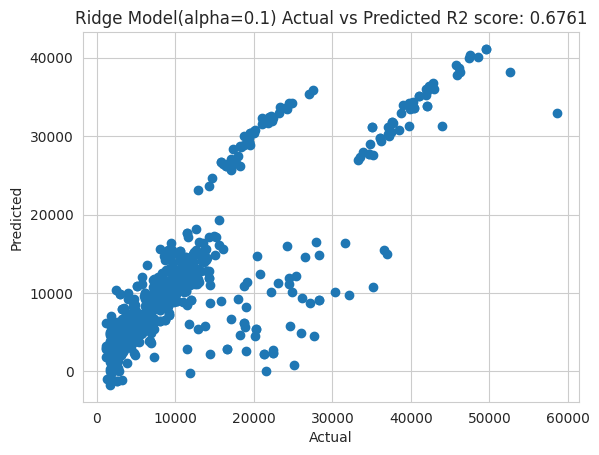

In [403]:
ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

ridge_score = ridge_model.score(X_test, y_test)
ridge_mse = mean_squared_error(y_test, y_pred)

print(f'Ridge Model(alpha=0.1) R^2 Score on test data: {ridge_score}')
print(f'Ridge Model(alpha=0.1) MSE on test data: {ridge_mse}')
print(f'Ridge Model(alpha=0.1) RMSE on test data: {np.sqrt(ridge_mse)}')
print('')

plt.scatter(y_test, y_pred)
plt.title(f'Ridge Model(alpha=0.1) Actual vs Predicted R2 score: {ridge_score:.4f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [404]:
RR = Ridge()

parameters1 = [{'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

Grid1 = GridSearchCV(RR, parameters1, cv=4)

Grid1.fit(X_train_pr, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.73279e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.78083e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.17471e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.9636e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

Ridge(alpha=10) R2 score with best alpha : 0.7915109178238166
Ridge(alpha=10) MSE with best alpha : 27476008.872436088
Ridge(alpha=10) RMSE with best alpha : 5241.75627747381



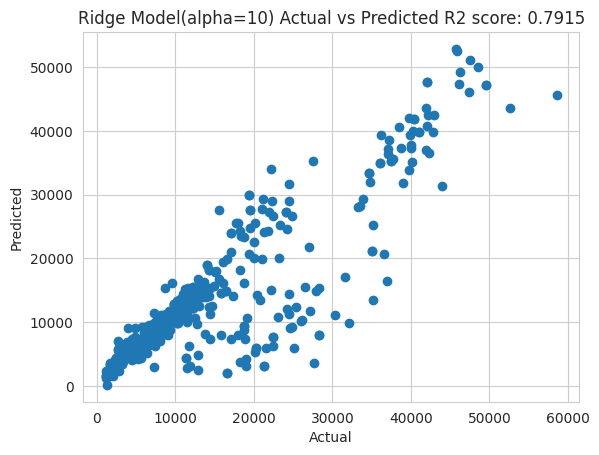

In [405]:
BestR = Grid1.best_estimator_

y_pred = BestR.predict(X_test_pr)

BestR_score = BestR.score(X_test_pr, y_test)
BestR_mse = mean_squared_error(y_test, y_pred)

print(f"Ridge(alpha={BestR.get_params()['alpha']}) R2 score with best alpha : {BestR_score}")
print(f"Ridge(alpha={BestR.get_params()['alpha']}) MSE with best alpha : {mean_squared_error(y_test, y_pred)}")
print(f"Ridge(alpha={BestR.get_params()['alpha']}) RMSE with best alpha : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print('')

plt.scatter(y_test, y_pred)
plt.title(f"Ridge Model(alpha={BestR.get_params()['alpha']}) Actual vs Predicted R2 score: {BestR_score:.4f}")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Decision Tree R^2 Score on test data : 0.9022845110080913
Decision Tree MSE on test data : 12877564.688242523
Decision Tree RMSE on test data : 3588.5323864001175



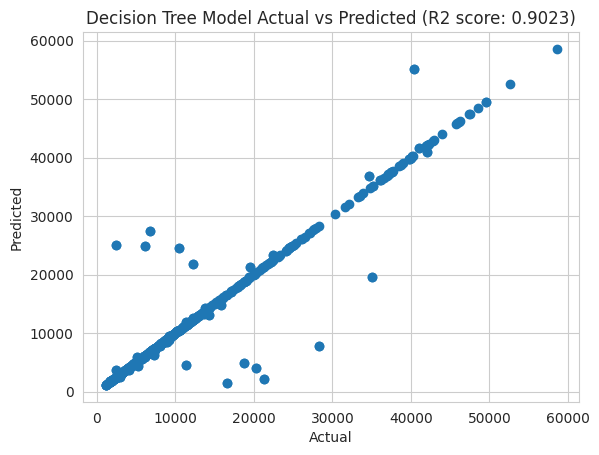

In [409]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

dtree_mse = mean_squared_error(y_test, y_pred)
dtree_score = dtree.score(X_test, y_test)

print(f'Decision Tree R^2 Score on test data : {dtree_score}')
print(f'Decision Tree MSE on test data : {dtree_mse}')
print(f'Decision Tree RMSE on test data : {np.sqrt(dtree_mse)}')
print('')

plt.scatter(y_test, y_pred)
plt.title(f'Decision Tree Model Actual vs Predicted (R2 score: {dtree_score:.4f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Decision Tree R^2 Score on test data : 0.9127960712458989
Decision Tree MSE on test data : 11492284.848442161
Decision Tree RMSE on test data : 3390.027263672397



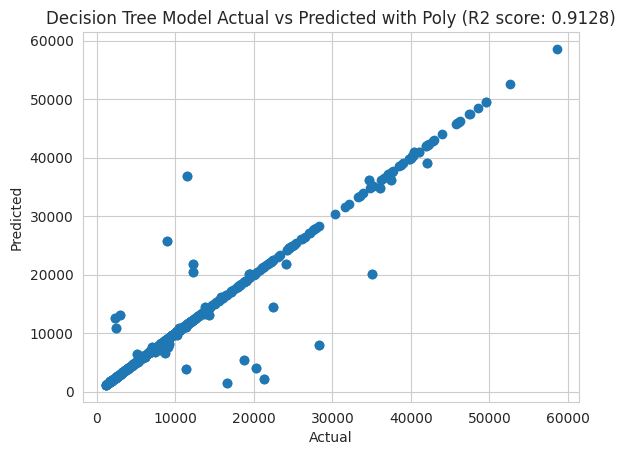

In [410]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_pr, y_train)

y_pred = dtree.predict(X_test_pr)

dtree_mse = mean_squared_error(y_test, y_pred)
dtree_score = dtree.score(X_test_pr, y_test)

print(f'Decision Tree R^2 Score on test data : {dtree_score}')
print(f'Decision Tree MSE on test data : {dtree_mse}')
print(f'Decision Tree RMSE on test data : {np.sqrt(dtree_mse)}')
print('')

plt.scatter(y_test, y_pred)
plt.title(f'Decision Tree Model Actual vs Predicted with Poly (R2 score: {dtree_score:.4f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## **Conclusion**

|  | **Mean Squared Error** | **Root Mean Squared Error** | **R^2 Score** |
|---|---|---|---|
| Simple Linear Regression 'Smoker Feature' |  |  | **0.6221** |
| Multiple Linear Regression |  |  | **0.7504** |
| Polynomial Regression (Degree 2) | 285119510.168 | 5340.366 | **0.7835** |
| Polynomial Regression (Degree 4) | 27529954.177 | 5246.899 | **0.7911** |
| Ridge Model with Polynomial (alpha=0.1)  | 42688122.839 | 6533.614 | **0.6760** |
| Ridge Model with Polynomial (alpha=10) (Degree=4) | 27476008.872 | 5241.756 | **0.7915** |
| Decision Tree (Raw) | 13232592.883 | 3637.663 | **0.8995** |
| Decision Tree (Polynomial) | 10826086.300 | 3290.301 | **0.9178** |

After analyzing the results of various regression models applied to dataset, observed a significant improvement in performance from simple to more complex models. The Decision Tree Regressor, especially when combined with Polynomial features, emerged as the most effective model with the highest R² score of 0.9178, indicating superior predictive accuracy compared to other models. This model also showed the lowest Root Mean Squared Error (RMSE) at 3290.301, which suggests better performance in predicting the target variable. Notably, the Polynomial Regression model with a degree of 4 also demonstrated considerable improvement over the simple and multiple linear regression models, with a notable increase in the R² score to 0.7911. However, the Ridge Regression with an alpha of 10 and polynomial features (degree=4) achieved a comparable R² score of 0.7915, indicating its effectiveness in controlling overfitting while maintaining accuracy. Overall, the decision tree models, particularly when enhanced with polynomial features, provided the best fit for the data.